In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline

print ('Files in data folder:')

data_folder = '/kaggle/dev/data-science-bowl-2017-data/'
os.listdir(data_folder)

Files in data folder:


['stage1_sample_submission.zip',
 'stage1.7z',
 'sample_images',
 'stage1',
 'stage1_sample_submission.csv',
 'sample_images.7z',
 'stage1_labels.csv',
 'stage1_labels.zip',
 'data_password.txt']

In [98]:
sample_images_folder = data_folder + '/sample_images/'
data_images_folder = data_folder + '/stage1/'

for d in os.listdir(sample_images_folder):
    print("Patient '{}' has {} scans".format(d, len(os.listdir(data_images_folder + d))))
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir(data_images_folder)), 
                                                      len(glob.glob(data_images_folder + '*/*.dcm'))))

Patient '0c98fcb55e3f36d0c2b6507f62f4c5f1' has 180 scans
Patient '0d19f1c627df49eb223771c28548350e' has 183 scans
Patient '0c37613214faddf8701ca41e6d43f56e' has 164 scans
Patient '0d2fcf787026fece4e57be167d079383' has 126 scans
Patient '0a38e7597ca26f9374f8ea2770ba870d' has 110 scans
Patient '00cba091fa4ad62cc3200a657aeb957e' has 134 scans
Patient '0d941a3ad6c889ac451caf89c46cb92a' has 177 scans
Patient '0a0c32c9e08cc2ea76a71649de56be6d' has 133 scans
Patient '0c60f4b87afcb3e2dfa65abbbf3ef2f9' has 136 scans
Patient '0c9d8314f9c69840e25febabb1229fa4' has 221 scans
Patient '0ca943d821204ceb089510f836a367fd' has 147 scans
Patient '0b20184e0cd497028bdd155d9fb42dc9' has 196 scans
Patient '0c0de3749d4fe175b7a5098b060982a1' has 123 scans
Patient '0c59313f52304e25d5a7dcf9877633b1' has 244 scans
Patient '0bd0e3056cbf23a1cb7f0f0b18446068' has 280 scans
Patient '0de72529c30fe642bc60dcb75c87f6bd' has 113 scans
Patient '0ddeb08e9c97227853422bd71a2a695e' has 171 scans
Patient '0a099f2549429d29b32f34

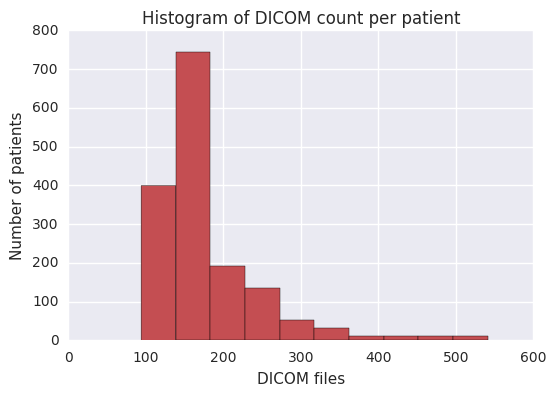

In [100]:
p = sns.color_palette()

# patient_sizes = [len(os.listdir(sample_images_folder + d)) for d in os.listdir(sample_images_folder)]
# plt.hist(patient_sizes, color=p[2])
# plt.ylabel('Number of patients')
# plt.xlabel('DICOM files')
# plt.title('Histogram of DICOM count per patient')

patient_sizes = [len(os.listdir(data_images_folder + d)) for d in os.listdir(data_images_folder)]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

In [101]:
sizes = [os.path.getsize(dcm)/1000000 for dcm in glob.glob(data_images_folder + '*/*.dcm')]
print('DCM file sizes: min {:.3}MB max {:.3}MB avg {:.3}MB std {:.3}MB'.format(np.min(sizes), 
                                                       np.max(sizes), np.mean(sizes), np.std(sizes)))

DCM file sizes: min 0.525MB max 0.526MB avg 0.525MB std 3.55e-05MB


In [107]:
df_train = pd.read_csv(data_folder + '/stage1_labels.csv')
df_train.head()

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1


In [103]:
print('Number of training patients: {}'.format(len(df_train)))
print('Cancer rate: {:.4}%'.format(df_train.cancer.mean()*100))

Number of training patients: 1397
Cancer rate: 25.91%


In [104]:
from sklearn.metrics import log_loss
logloss = log_loss(df_train.cancer, np.zeros_like(df_train.cancer) + df_train.cancer.mean())
print('Training logloss is {}'.format(logloss))

Training logloss is 0.5721414894789518


In [105]:
sample = pd.read_csv(data_folder + 'stage1_sample_submission.csv')
sample['cancer'] = df_train.cancer.mean()
sample.to_csv('/kaggle/dev/data-science-bowl-2017/submissions/naive_submission.csv', index=False)

print(sample.shape)

(198, 2)


** Dicom analysis **

In [54]:
import dicom

In [55]:
dcm = sample_images_folder + '0a38e7597ca26f9374f8ea2770ba870d/4ec5ef19b52ec06a819181e404d37038.dcm'
print('Filename: {}'.format(dcm))
dcm = dicom.read_file(dcm)

Filename: /kaggle/dev/data-science-bowl-2017-data//sample_images/0a38e7597ca26f9374f8ea2770ba870d/4ec5ef19b52ec06a819181e404d37038.dcm


In [56]:
dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.160978843216949953815246551971491067836
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '0a38e7597ca26f9374f8ea2770ba870d'
(0010, 0020) Patient ID                          LO: '0a38e7597ca26f9374f8ea2770ba870d'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.13148394979245937484165594540025668927189308811493143066650
(0020, 000e) Series Instance UID                 UI: 2.25.53298563728906335585833752405238884704498238267638676785109
(0020, 0011) Series Number                       IS: '2'
(0020, 0012) Acquisition Number            

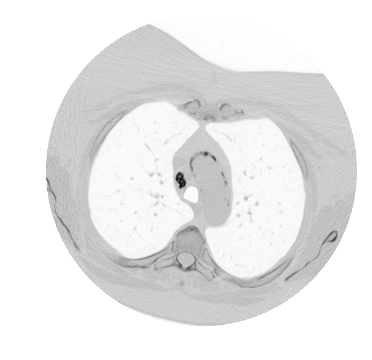

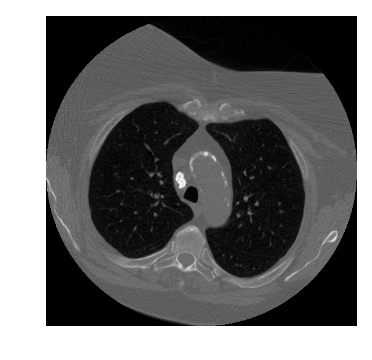

In [58]:
img = dcm.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

In [62]:
def dicom_to_image(filename):
    dcm = dicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

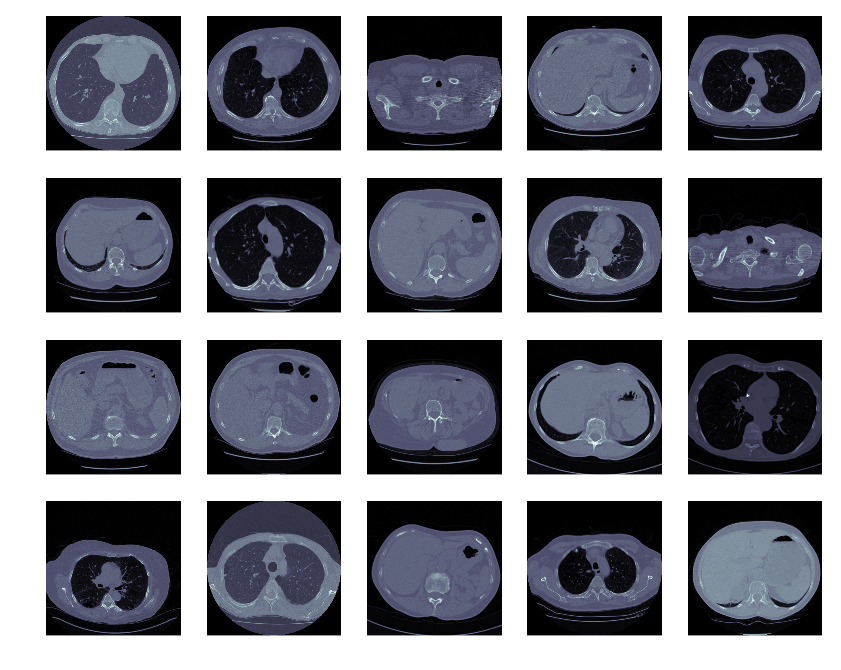

In [69]:
files = glob.glob(sample_images_folder + '*/*.dcm')

f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

In [71]:
def get_slice_location(dcm):
    return float(dcm[0x0020, 0x1041].value)

# Returns a list of images for that patient_id, in ascending order of Slice Location
def load_patient(patient_id):
    files = glob.glob(sample_images_folder + '{}/*.dcm'.format(patient_id))
    imgs = {}
    for f in files:
        dcm = dicom.read_file(f)
        img = dcm.pixel_array
        img[img == -2000] = 0
        sl = get_slice_location(dcm)
        imgs[sl] = img
        
    # Not a very elegant way to do this
    sorted_imgs = [x[1] for x in sorted(imgs.items(), key=lambda x: x[0])]
    return sorted_imgs

In [72]:
pat = load_patient('0a38e7597ca26f9374f8ea2770ba870d')


Patient with no cancer

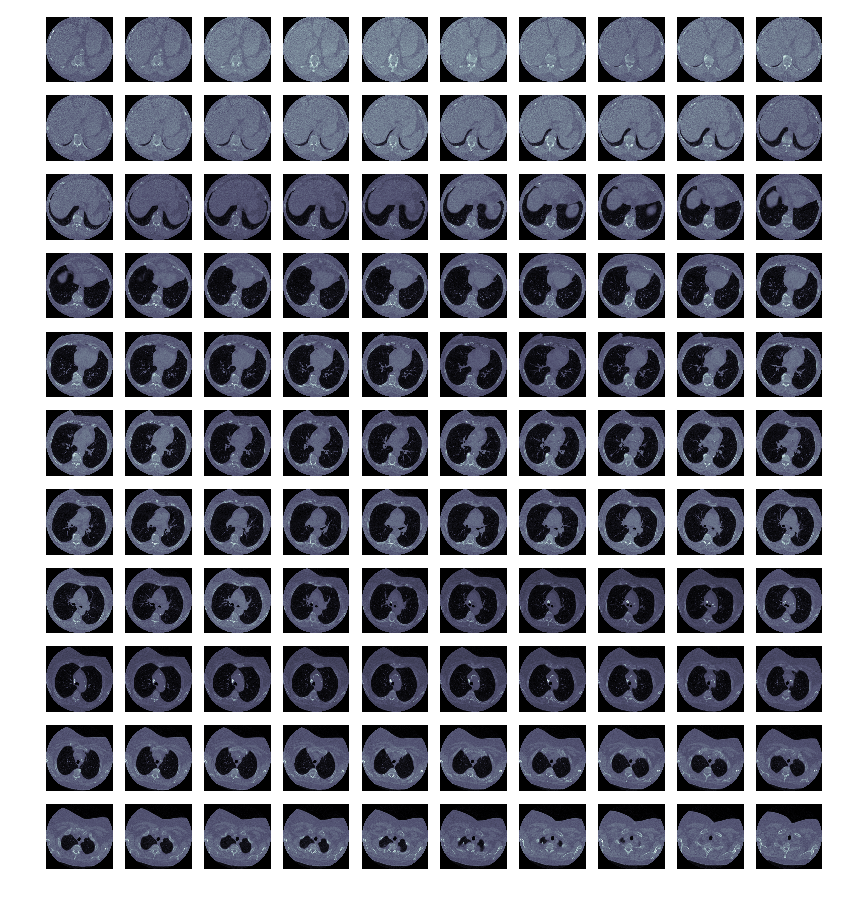

In [74]:
f, plots = plt.subplots(11, 10, sharex='all', sharey='all', figsize=(10, 11))
# matplotlib is drunk
#plt.title('Sorted Slices of Patient 0a38e7597ca26f9374f8ea2770ba870d - No cancer')
for i in range(110):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

Patient with cancer

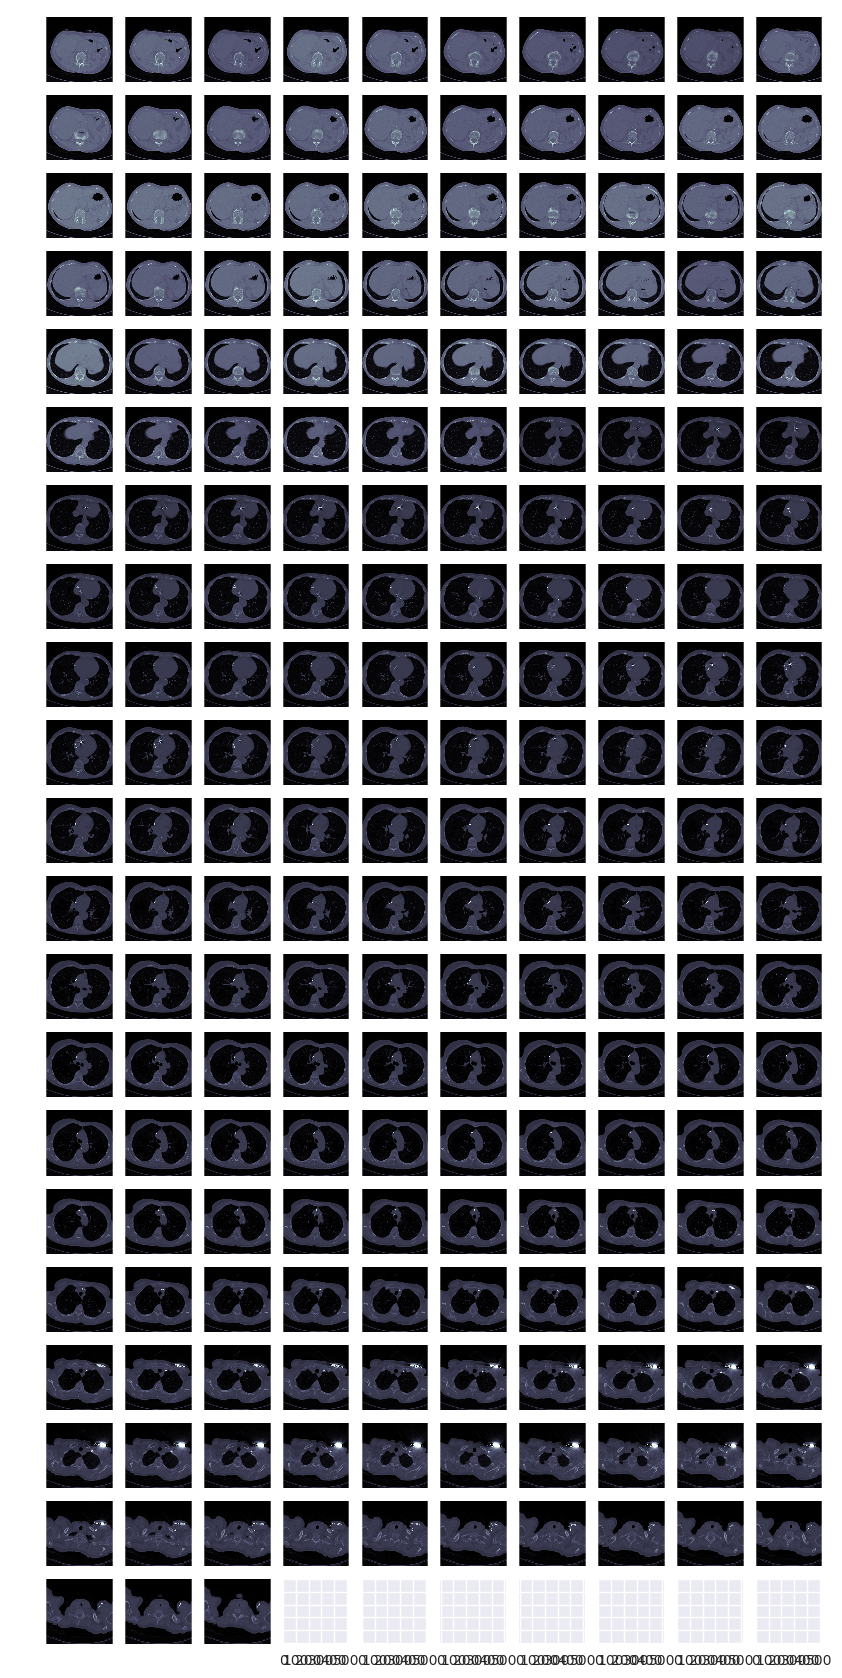

In [75]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')
f, plots = plt.subplots(21, 10, sharex='all', sharey='all', figsize=(10, 21))
for i in range(203):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

Animation

In [76]:
# This function takes in a single frame from the DICOM and returns a single frame in RGB format.
def normalise(img):
    normed = (img / 14).astype(np.uint8) # Magic number, scaling to create int between 0 and 255
    img2 = np.zeros([*img.shape, 3], dtype=np.uint8)
    for i in range(3):
        img2[:, :, i] = normed
    return img2

In [77]:
npat = [normalise(p) for p in pat]

In [85]:
# This section doesnt work because ffmpeg writer isnt being recognized by matplotlib

# pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')

# import matplotlib.animation as animation
# def animate(pat, gifname):
#     # Based on @Zombie's code
#     fig = plt.figure()
#     anim = plt.imshow(pat[0], cmap=plt.cm.bone)
#     def update(i):
#         anim.set_array(pat[i])
#         return anim,
    
#     a = animation.FuncAnimation(fig, update, frames=range(len(pat)), interval=50, blit=True)
#     FFwriter = animation.FFMpegWriter()
#     a.save(gifname, writer = FFwriter)

# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# animate(pat, 'test.gif')